In [1]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")
from os.path import join

# Results
import results
reload(results)
print 'Done.'

Done.


In [2]:
Results = results.Results
ID = 2
date = '2016_07_01'
r = Results(date, ID)
# print join(r.config['data']['path'], str(003))
r.print_config()

Aim:
Got rid of the second fc layer
global


dropout_rate,0.8
optimizer,adam
seed_randomness,False
fc2_neuron_count,0
learning_rate,0.001
batch_size,100
final_activation,softmax
fc1_neuron_count,0
iterations,800
dump_frames,False
path,data


results


early_stop_iteration,210


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.4


weights


weights initialisation,"['std_dev', 0.2]"
bias initial value,0.1


data


image_region,full
remove_empty_labels,False
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
image_shape,"[47, 47]"
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
disfa_au_map,"[1, 2, 4, 5, 6, 9, 12, 15, 17, 20, 25, 26]"
threshold,1
normalisation_type,face


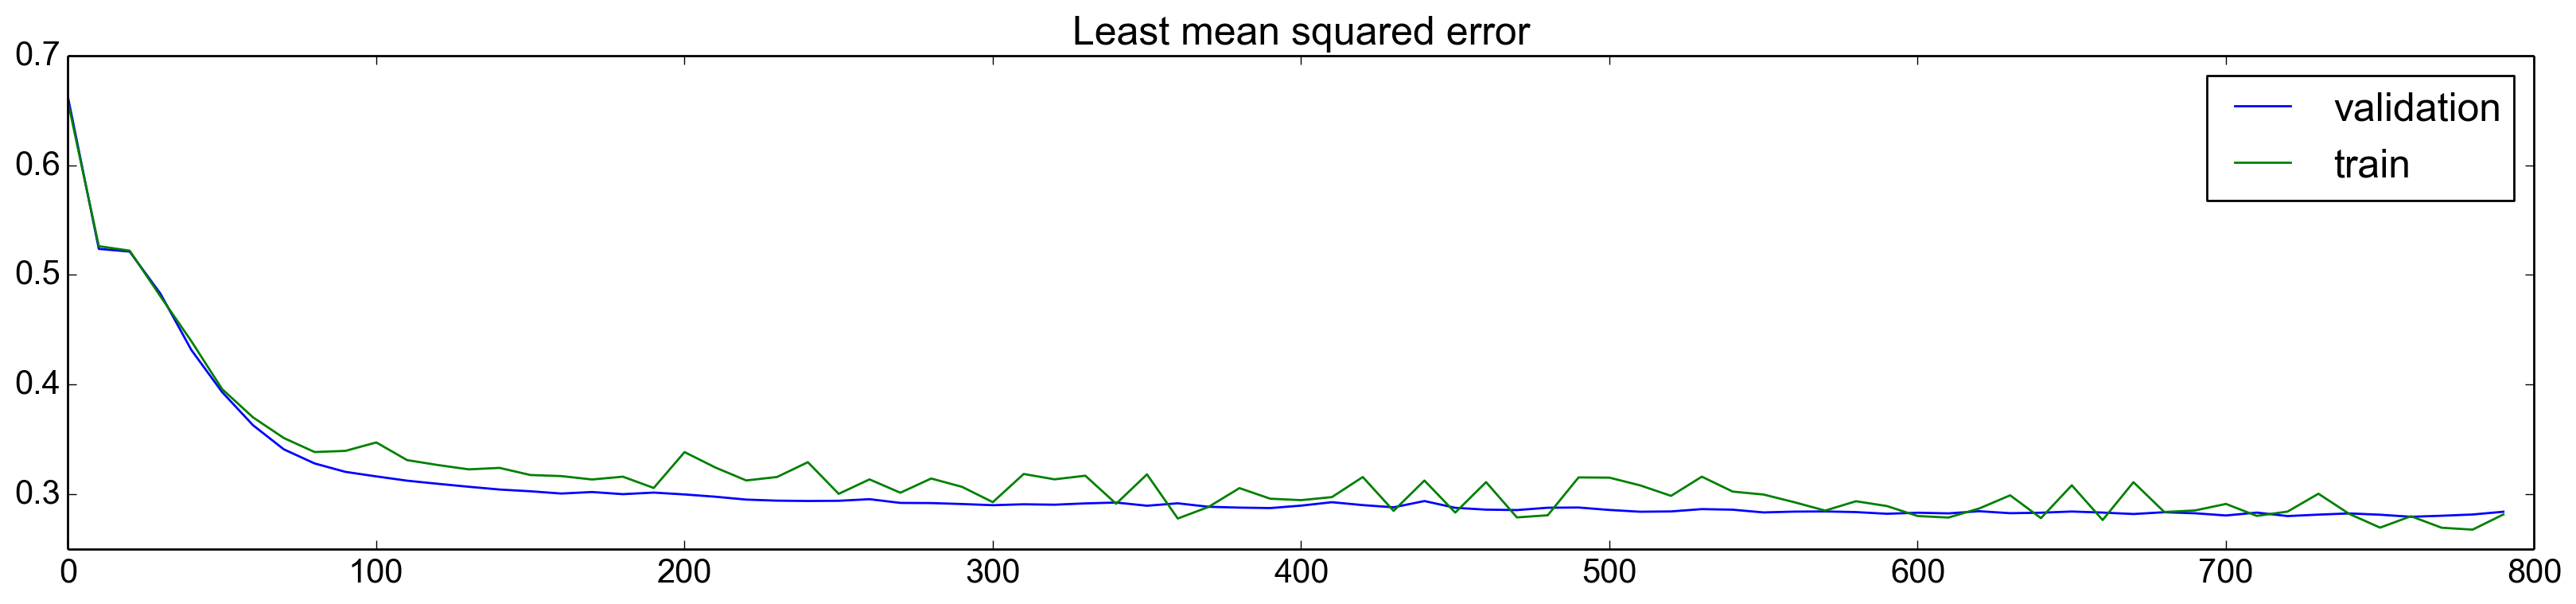

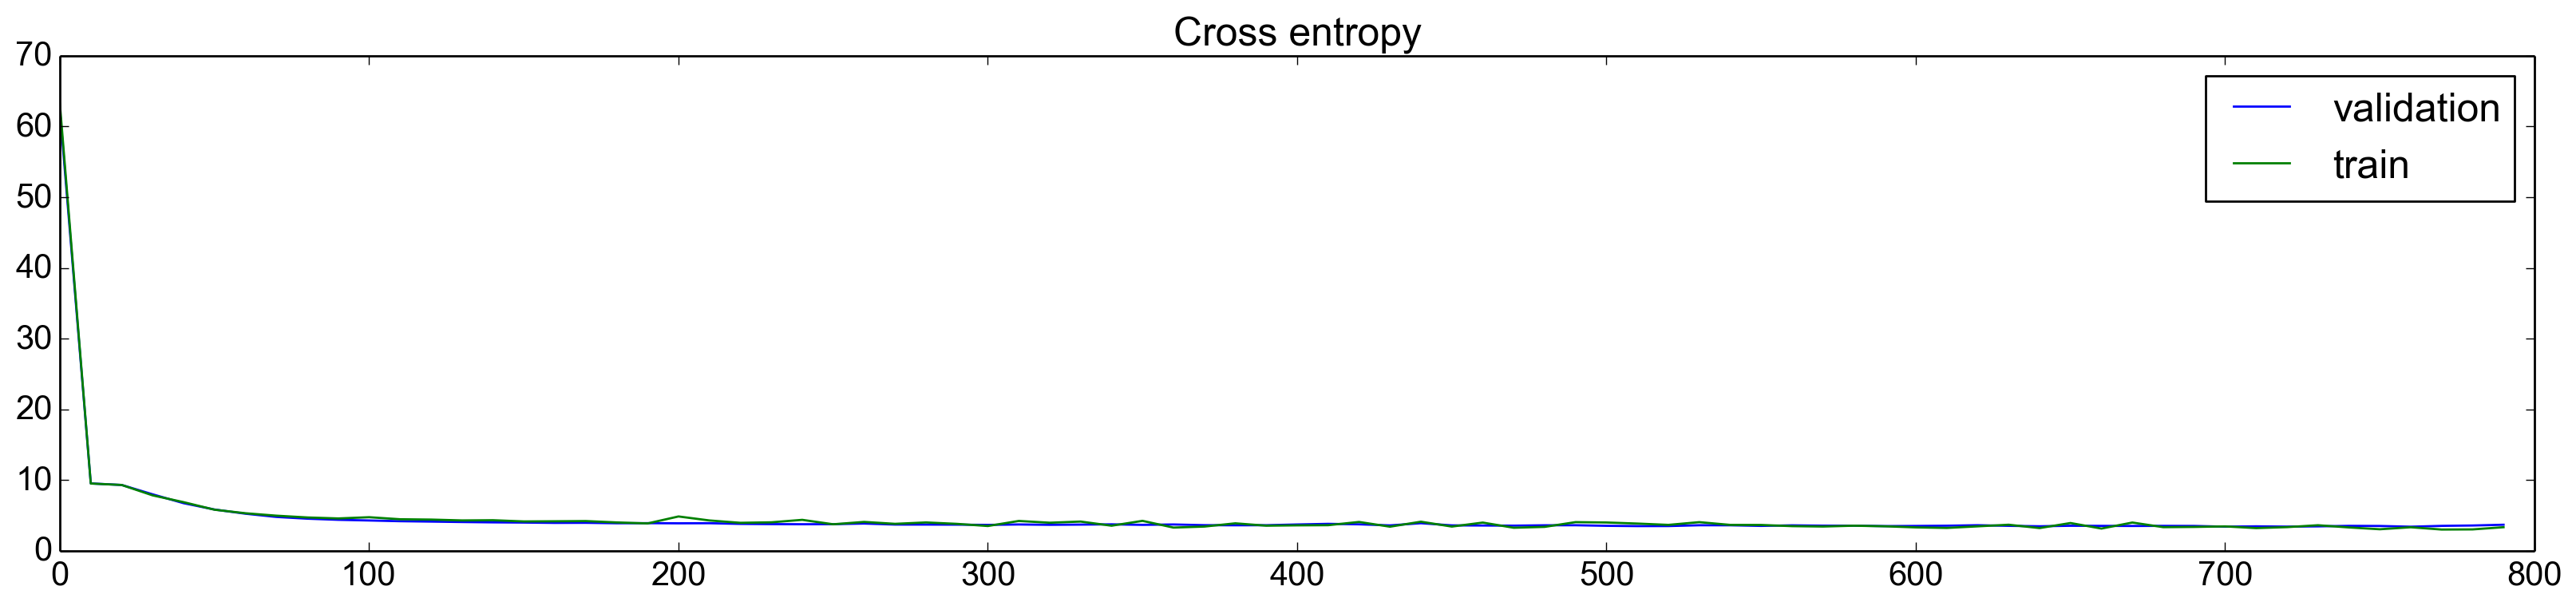

In [3]:
r.lmsq()
r.cross()

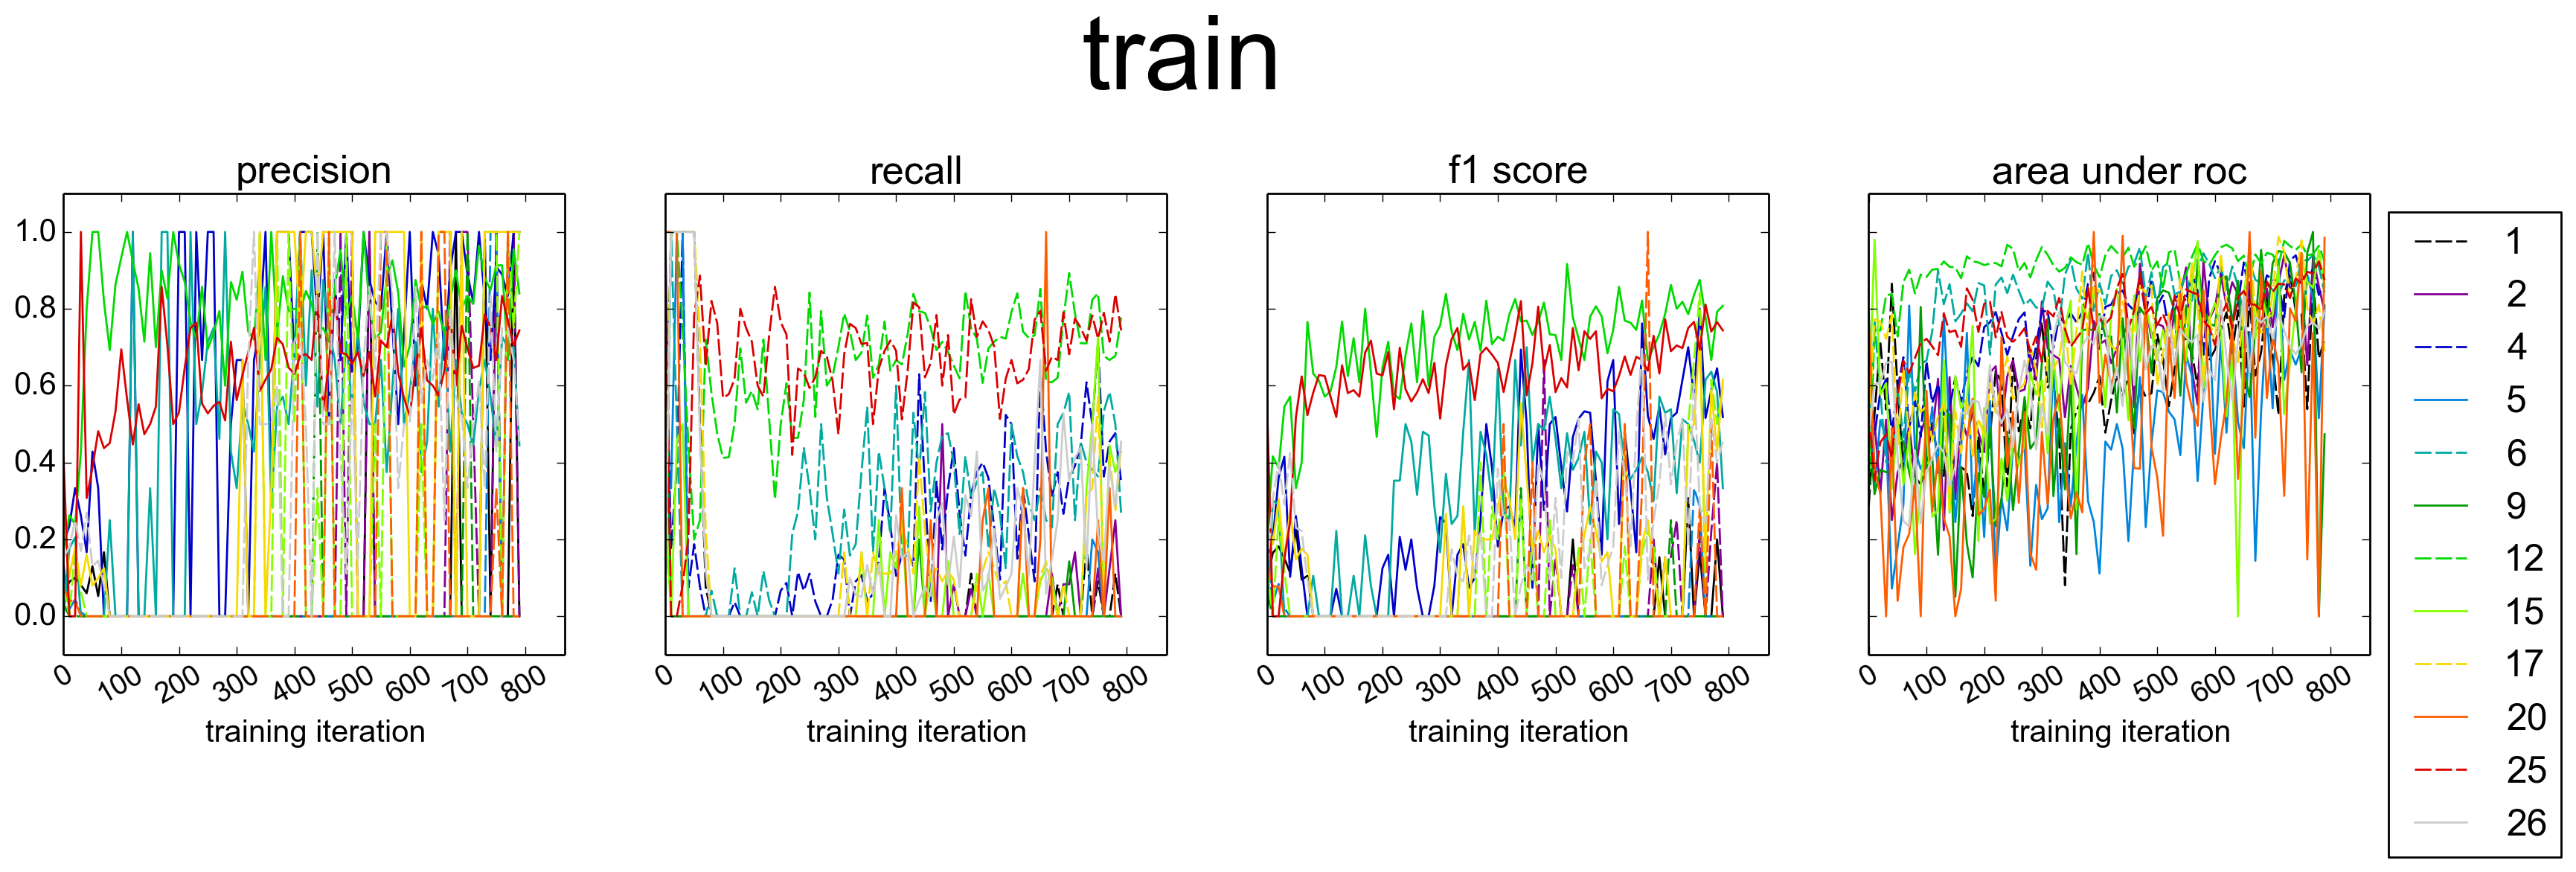

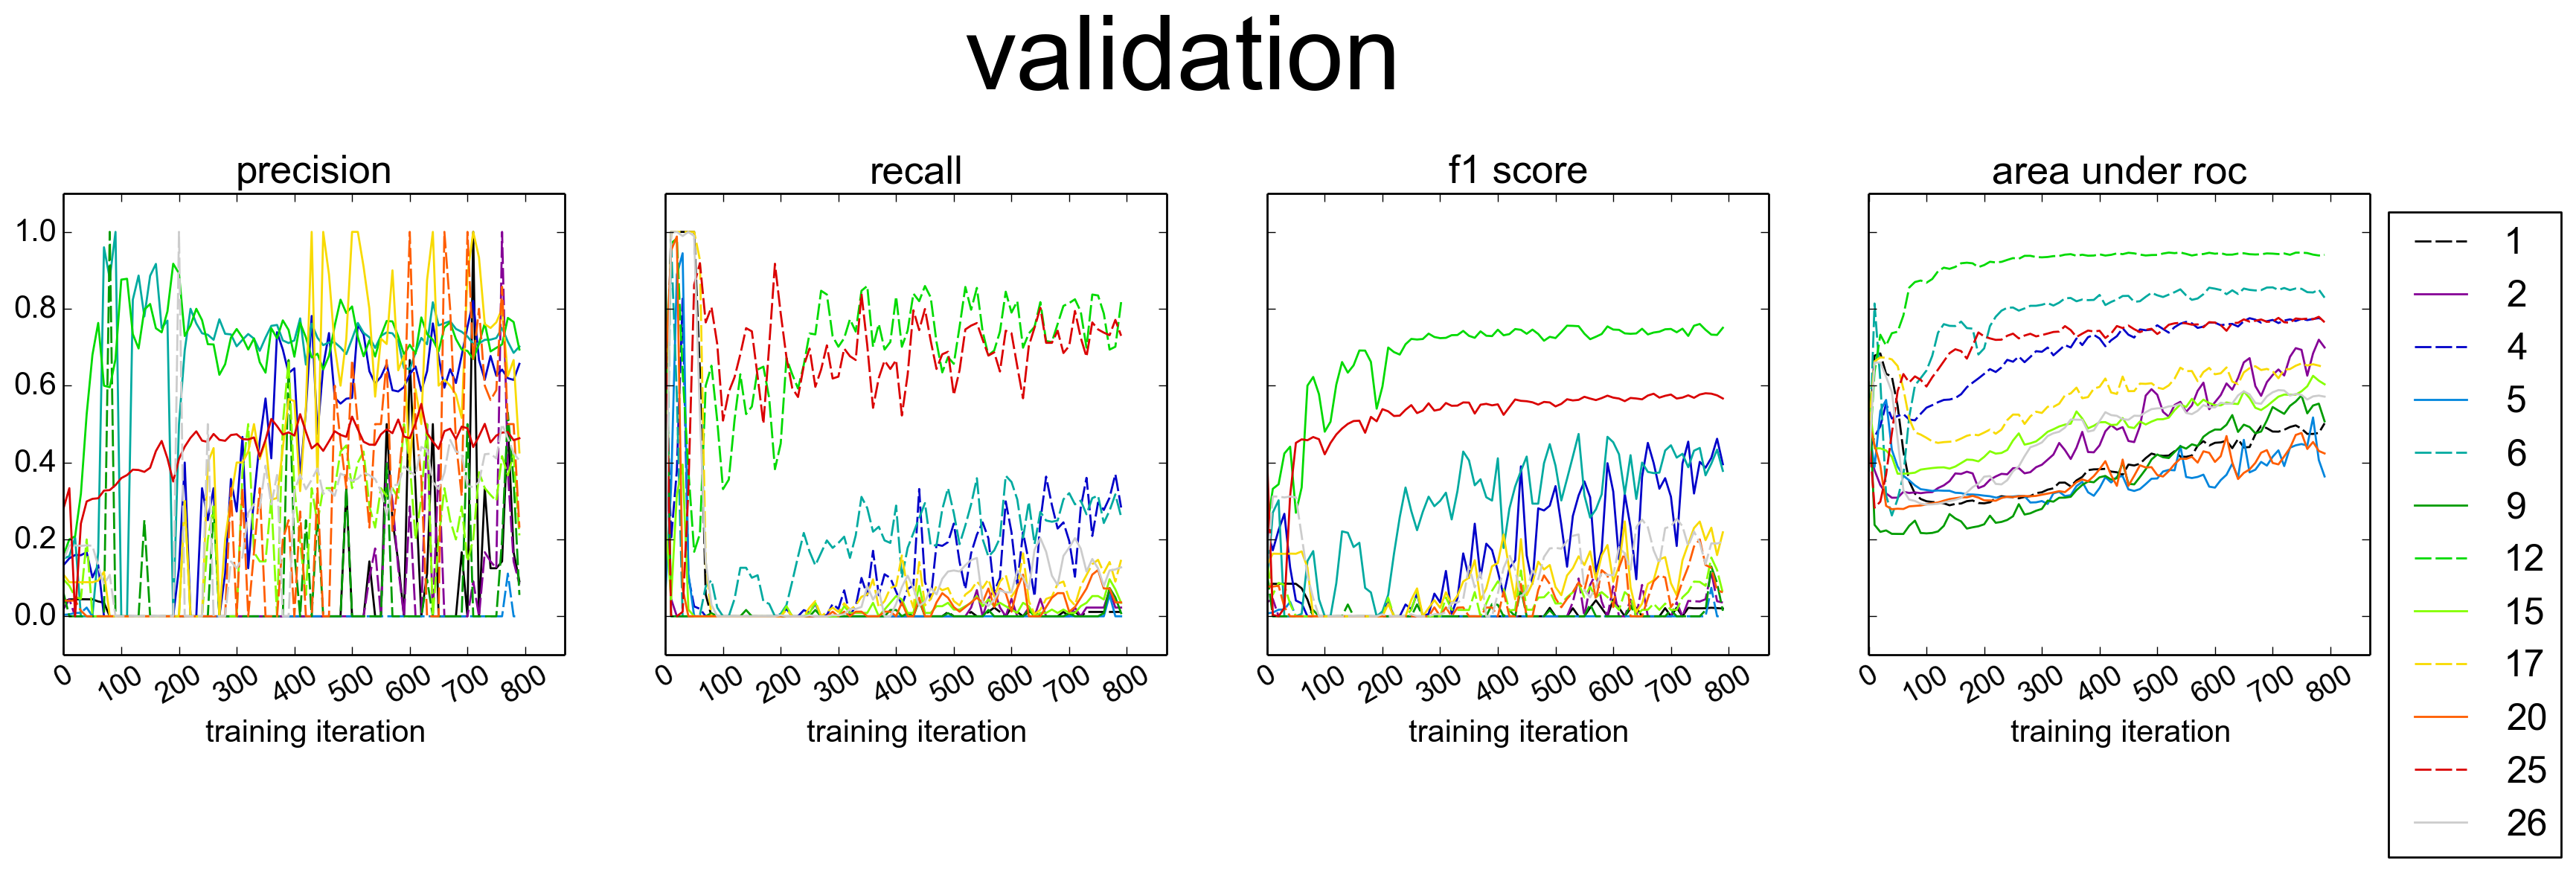

In [4]:
r.au('train',smooth=False)
r.au('validation',smooth=False)
# r.roc_plot('final')
# r.roc_plot('early')
# r.test_confusion('early')

# Test set:

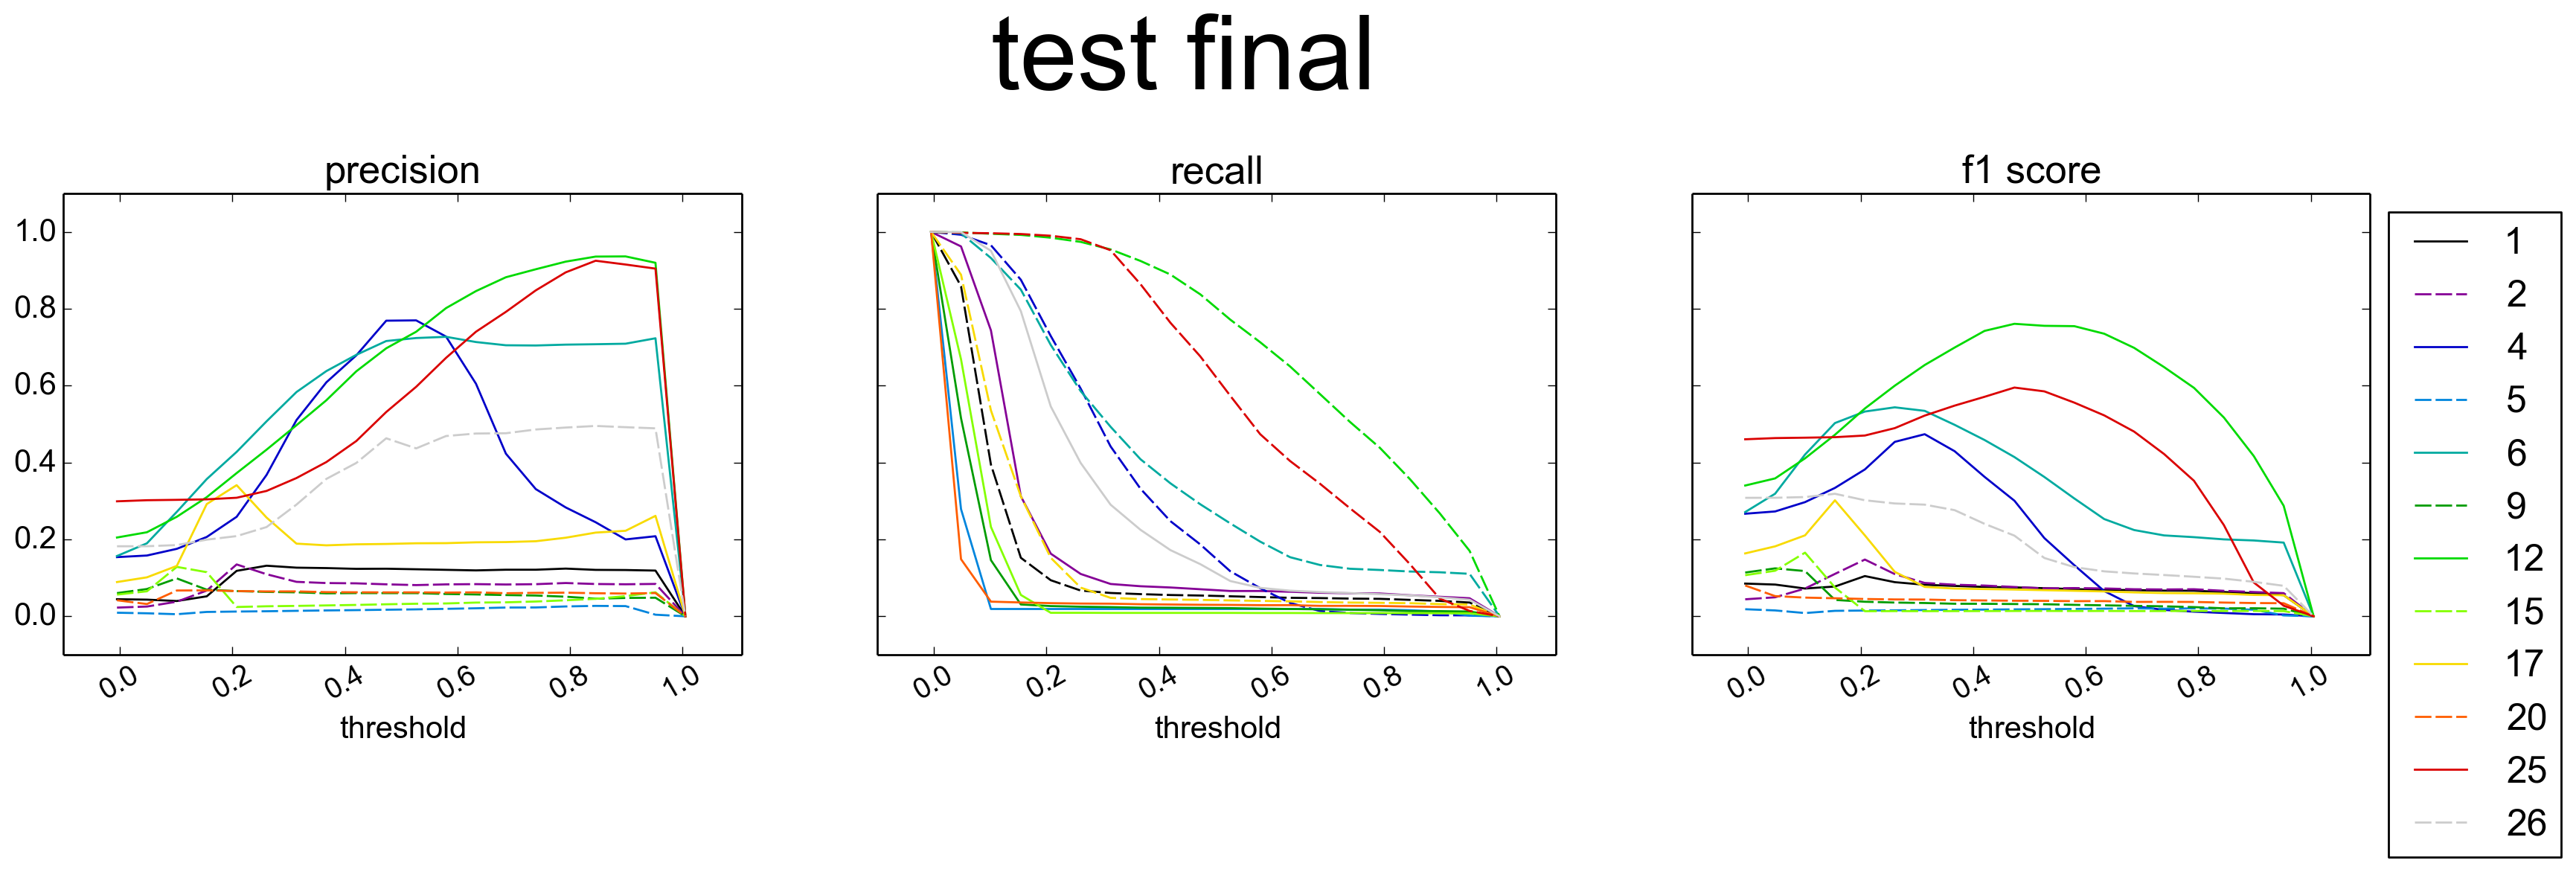

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.48 	fail 	0.1 	0.13 	1.0
2 	0.71 	fair 	0.15 	0.13 	1.0
4 	0.77 	fair 	0.47 	0.77 	1.0
5 	0.44 	fail 	0.02 	0.03 	1.0
6 	0.86 	good 	0.54 	0.73 	1.0
9 	0.57 	fail 	0.12 	0.1 	1.0
12 	0.95 	great 	0.76 	0.94 	1.0
15 	0.59 	fail 	0.17 	0.13 	1.0
17 	0.65 	poor 	0.3 	0.34 	1.0
20 	0.39 	fail 	0.08 	0.07 	1.0
25 	0.78 	fair 	0.6 	0.92 	1.0
26 	0.58 	fail 	0.32 	0.5 	1.0
average roc =  0.646451525447
best thresholds
au	best roc	best f1		col3-col2
1 	0.2 		0.21 		0.01
2 	0.11 		0.21 		0.1
4 	0.26 		0.31 		0.05
5 	0.84 		0.79 		-0.05
6 	0.16 		0.26 		0.1
9 	0.08 		0.05 		-0.03
12 	0.42 		0.47 		0.05
15 	0.07 		0.1 		0.03
17 	0.13 		0.15 		0.02
20 	0.11 		-0.01 		-0.12
25 	0.48 		0.47 		-0.01
26 	0.37 		0.15 		-0.22


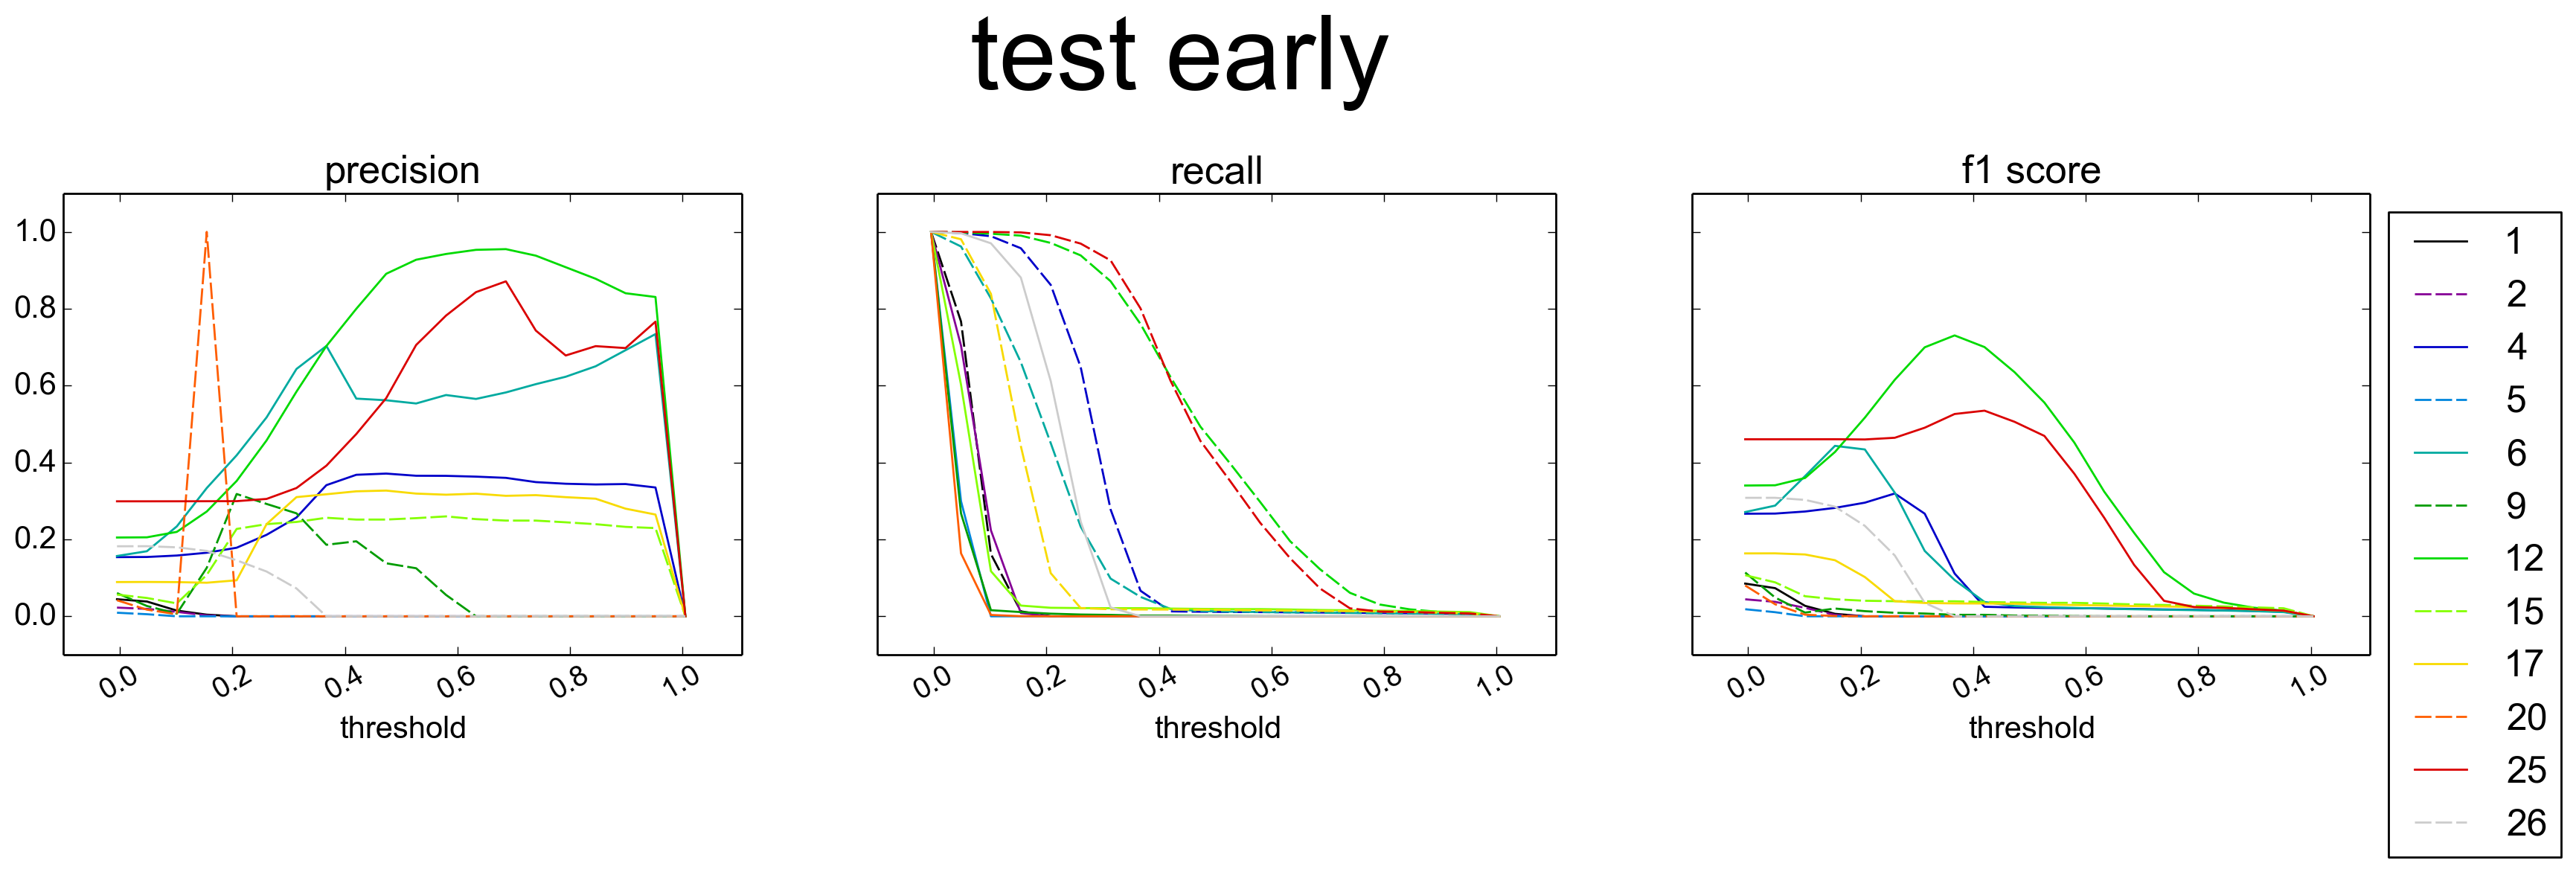

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.29 	fail 	0.09 	0.04 	1.0
2 	0.35 	fail 	0.04 	0.02 	1.0
4 	0.64 	poor 	0.32 	0.37 	1.0
5 	0.33 	fail 	0.02 	0.01 	1.0
6 	0.76 	fair 	0.44 	0.73 	1.0
9 	0.26 	fail 	0.11 	0.32 	1.0
12 	0.93 	great 	0.73 	0.96 	1.0
15 	0.41 	fail 	0.11 	0.26 	1.0
17 	0.5 	fail 	0.16 	0.33 	1.0
20 	0.3 	fail 	0.08 	1.0 	1.0
25 	0.72 	fair 	0.53 	0.87 	1.0
26 	0.36 	fail 	0.31 	0.18 	1.0
average roc =  0.487218283273
best thresholds
au	best roc	best f1		col3-col2
1 	0.2 		-0.01 		-0.21
2 	0.11 		-0.01 		-0.12
4 	0.26 		0.26 		0.0
5 	0.84 		-0.01 		-0.85
6 	0.16 		0.15 		-0.01
9 	0.08 		-0.01 		-0.09
12 	0.42 		0.37 		-0.05
15 	0.07 		-0.01 		-0.08
17 	0.13 		0.05 		-0.08
20 	0.11 		-0.01 		-0.12
25 	0.48 		0.42 		-0.06
26 	0.37 		0.05 		-0.32


In [5]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

In [6]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  1 threshold:  0.21
	[  283 	 2732 	]
	[  2110 	 62705 	]
	roc:	0.48
	f1:	0.1
	p:	0.12
	r:	0.09
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  2 threshold:  0.21
	[  250 	 1284 	]
	[  1603 	 64693 	]
	roc:	0.71
	f1:	0.15
	p:	0.13
	r:	0.16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  4 threshold:  0.31
	[  4615 	 5828 	]
	[  4427 	 52960 	]
	roc:	0.77
	f1:	0.47
	p:	0.51
	r:	0.44
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  5 threshold:  0.79
	[  11 	 620 	]
	[  418 	 66781 	]
	roc:	0.44
	f1:	0.02
	p:	0.03
	r:	0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  6 threshold:  0.26
	[  6232 	 4408 	]
	[  6055 	 51135 	]
	roc:	0.86
	f1:	0.54
	p:	0.51
	r:	0.59
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  9 threshold:  0.05
	[  2110 	 1984 	]
	[  27638 	 36098 	]
	roc:	0.57
	f1:	0.12
	p:	0.07
	r:	0.52
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.47
	[  11643 	 2260 	]
	[  5057 	 48870 	]
	roc:	0.95
	f1:	0.76
	p:	0.7

## 

In [7]:
from results import prefix
from os.path import join
path = join(join('/home/luka/v/lm1015-tmp/data',join(date,prefix(ID,3))),'results.html')
!ipython nbconvert --to html results.ipynb
!cp 'results.html' $path

[NbConvertApp] Converting notebook results.ipynb to html
[NbConvertApp] Writing 2225043 bytes to results.html
cp: cannot create regular file ‘/home/luka/v/lm1015-tmp/data/2016_07_01/002/results.html’: No such file or directory
